In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv(r'iris.csv', header=0)
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
data['variety'] = data['variety'].map({'Setosa':0, 'Versicolor':1, 'Virginica':2})
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# Check whether duplicate data sets exist. If yes, delete them.
print('Number of data: ', len(data))
if data.duplicated().any() == True:
    data.drop_duplicates(inplace=True)
    print('Duplicate data sets have been deleted.')
    print('Number of data: ', len(data))
else:
    print('There are no duplicate data sets')

Number of data:  150
Duplicate data sets have been deleted.
Number of data:  149


In [6]:
# Check the number of irises in each type
data['variety'].value_counts()

0    50
1    50
2    49
Name: variety, dtype: int64

In [8]:
t0 = data[data['variety']==0]
t1 = data[data['variety']==1]
t2 = data[data['variety']==2]

t0 = t0.sample(len(t0), random_state=0)
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)

train_X = pd.concat([t0.iloc[:40, :-1], t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t0.iloc[:40, -1], t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)

test_X = pd.concat([t0.iloc[40:, :-1], t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t0.iloc[40:, -1], t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)

train_X = np.asarray(train_X)
train_y = np.asarray(train_y)

test_X = np.asarray(test_X)
test_y = np.asarray(test_y)

Text(0, 0.5, 'Error')

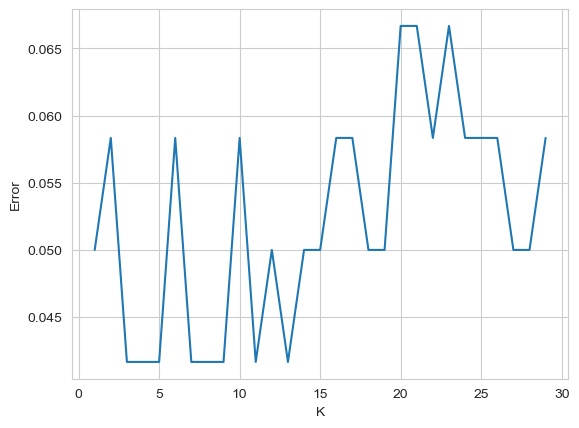

In [9]:
k_range = range(1, 30)
k_error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', p=2 , metric='minkowski')
    scores = cross_val_score(knn, train_X, train_y, cv = 5, scoring='accuracy')
    k_error.append(1-scores.mean())

plt.plot(k_range, k_error)
plt.xlabel('K')
plt.ylabel('Error')

In [21]:
clf = KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='auto', p=2 , metric='minkowski')
clf.fit(train_X, train_y)

# model apply
# k nearest neighbor
print(test_X[0, :])
print(test_y[0])
print(clf.kneighbors([test_X[0, :]]))

[5.5 3.5 1.3 0.2]
0
(array([[0.3       , 0.31622777, 0.33166248, 0.34641016, 0.36055513,
        0.42426407, 0.42426407, 0.45825757, 0.50990195, 0.51961524,
        0.54772256]]), array([[ 2,  7,  0, 18,  5, 25, 31, 23, 32,  9, 14]], dtype=int64))


In [31]:
prediction = clf.predict(test_X)

In [38]:
right = np.sum(prediction == test_y)
print(right)
wrong = np.sum(prediction != test_y)
print(wrong)

29
0
